In [34]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings("ignore") 
# sns.set_style("darkgrid", {"grid.color": ".6", 
#                            "grid.linestyle": ":"})
 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error 
# from sklearn.model_selection import GridSearchCV

In [48]:
from vnstock import *
import talib
import matplotlib.pyplot as plt


df = stock_historical_data("VNM", "2023-01-01", "2023-09-18", "1D", "index", source='TCBS')

# df.to_csv('stock.csv')

Time range is 260 days. Looping through 1 requests


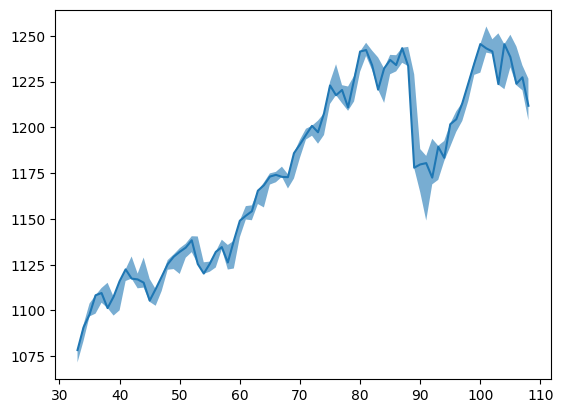

In [12]:
plt.plot (df['close'])
plt.fill_between(df.index, df['low'],df['high'], alpha = 0.6 )

/var/folders/cs/8r3m5sjs0rd7ts526sxtp81c0000gn/T/ipykernel_1995/191183143.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/cs/8r3m5sjs0rd7ts526sxtp81c0000gn/T/ipykernel_1995/191183143.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/cs/8r3m5sjs0r

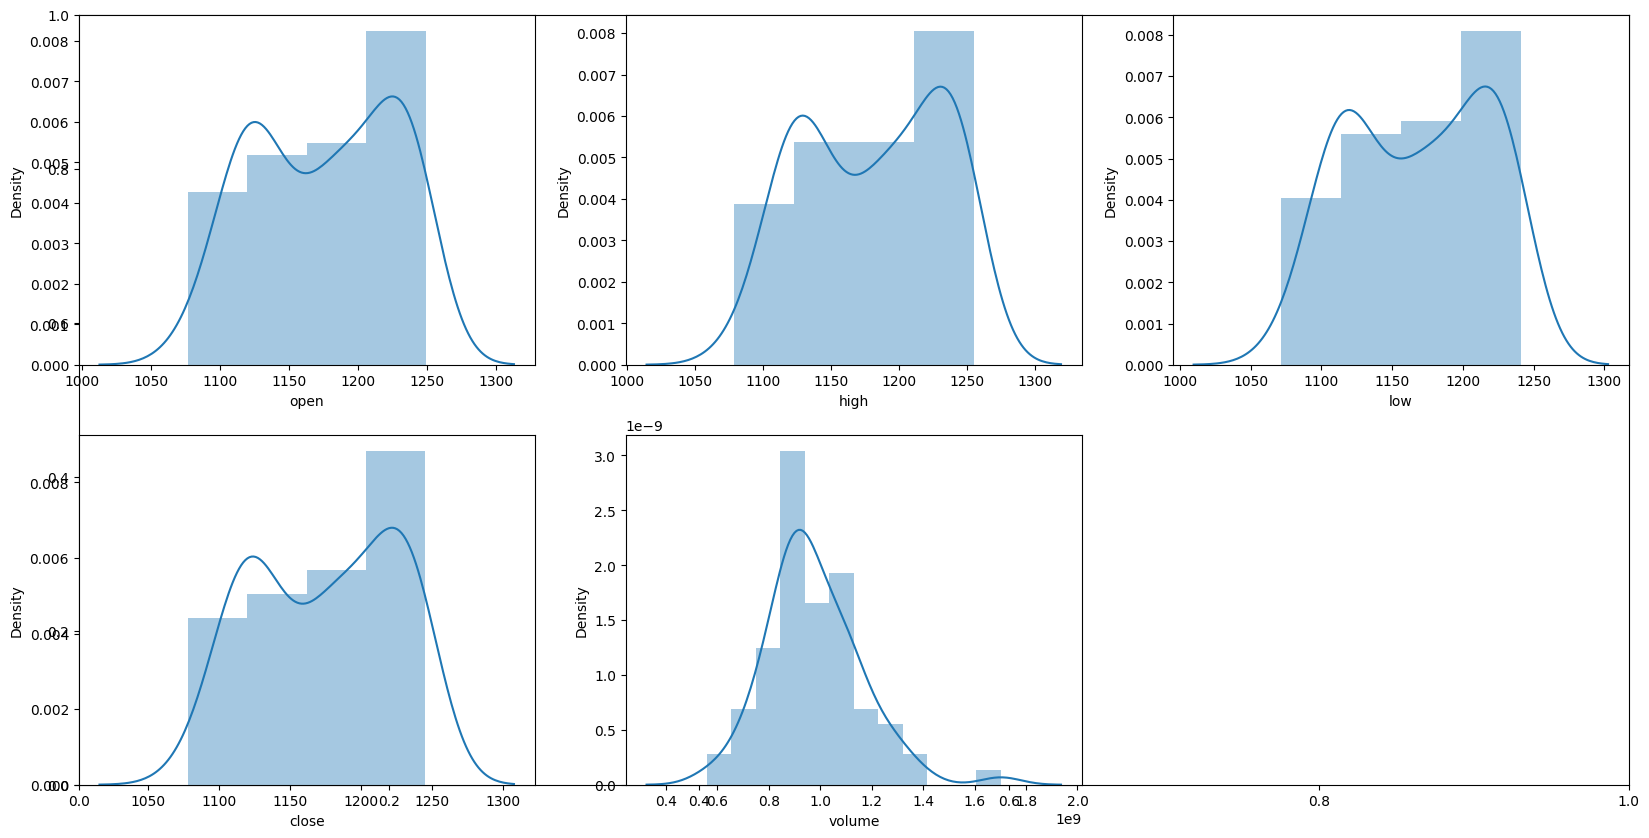

In [16]:
import seaborn as sns
features = ['open', 'high', 'low', 'close', 'volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

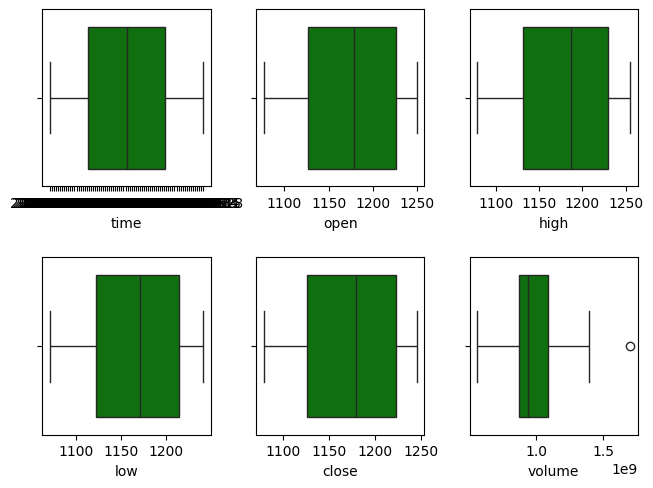

In [20]:
' Box plot '
# fig = plt.figure(figsize=(16,16))
temp = df.drop(['ticker'], axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=item, color='green')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

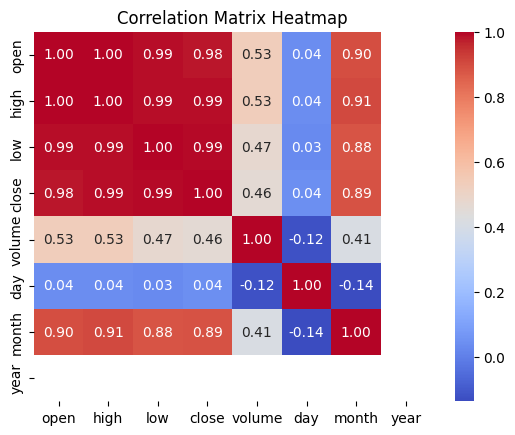

In [33]:
' Heat map'

corr_matrix = df.drop(['time','ticker'],axis=1).corr()

# Set up the matplotlib figure
# plt.figure(figsize=(20, 16))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [28]:

splitted = df['time'].str.split('-', expand=True)
 
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

In [29]:
# from fbprophet import Prophet


,time,open,high,low,close,volume,ticker,day,month,year
33,2023-06-01,1076.50,1078.39,1071.61,1078.39,856813100,VNINDEX,1,6,2023
34,2023-06-02,1084.19,1092.24,1083.36,1090.84,1037413832,VNINDEX,2,6,2023
35,2023-06-05,1099.66,1103.81,1096.76,1097.82,948361281,VNINDEX,5,6,2023
36,2023-06-06,1098.80,1108.31,1098.28,1108.31,842755231,VNINDEX,6,6,2023
37,2023-06-07,1110.79,1112.28,1104.26,1109.54,1000674077,VNINDEX,7,6,2023
...,...,...,...,...,...,...,...,...,...,...
104,2023-09-12,1223.55,1245.44,1220.85,1245.44,967867696,VNINDEX,12,9,2023
105,2023-09-13,1249.06,1250.61,1232.84,1238.39,1263786726,VNINDEX,13,9,2023
106,2023-09-14,1238.21,1244.21,1223.03,1223.81,1227453311,VNINDEX,14,9,2023
107,2023-09-15,1225.90,1233.87,1220.27,1227.36,917361628,VNINDEX,15,9,2023


In [43]:
X = df.drop(['time','ticker','close'], axis=1)
y = df['close']

y

33     1078.39
34     1090.84
35     1097.82
36     1108.31
37     1109.54
        ...   
104    1245.44
105    1238.39
106    1223.81
107    1227.36
108    1211.81
Name: close, Length: 76, dtype: float64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
 
# Fit the StandardScaler on the training dataset
scaler.fit(X_train)
 
# Transform the training dataset
# using the StandardScaler
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [46]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Create an instance of the XGBRegressor model
model_xgb = XGBRegressor()
 
# Fit the model to the training data
model_xgb.fit(x_train_scaled, y_train)
 
# Print the R-squared score on the training data
print("Xgboost Accuracy =", r2_score(
    y_train, model_xgb.predict(x_train_scaled)))

Xgboost Accuracy = 0.9999999994450424


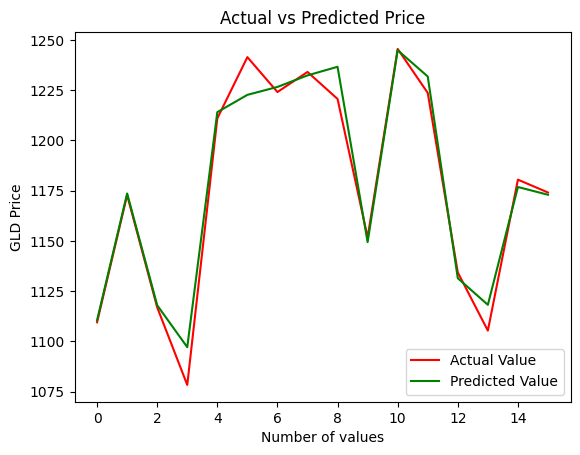

In [47]:
y_test = list (y_test)

plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(model_xgb.predict(x_test_scaled), color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()